# Calculating the longitudinal field

(In construction. Status: developing the Bz function in here, to be ported to a module afterward)

In [1]:
import specpolFlow as pol
import matplotlib.pyplot as plt
import numpy as np

loading specpolFlow package
importing specpolFlow.iolsd


In [2]:
import importlib # This is in case I made modification to the module, to force reloading
importlib.reload(pol)

loading specpolFlow package


<module 'specpolFlow' from '/Users/vpetit/ASTRO/programme/specpolFlow/__init__.py'>

Loading a LSD profile

In [3]:
lsd = pol.iolsd.read_lsd('SampleData/SampleLSD.s')

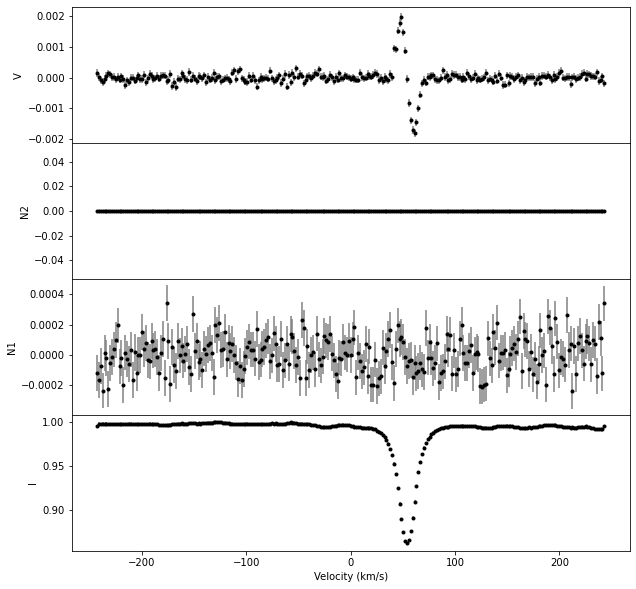

In [7]:
def plot_lsd(lsd, figsize=(10,10), **kwargs):
    '''Plot the LSD profile
    
    :param lsd: a lsd object
    :rtype: returns an fig, ax matplotlib container. 
    '''
    
    fig, ax = plt.subplots(4,1,figsize=figsize,sharex=True)
        
    ax[3].errorbar(lsd.vel, lsd.specI, yerr=lsd.specSigI, xerr=None, fmt='o', ms=3,ecolor='0.5',c='k',**kwargs)
    ax[2].errorbar(lsd.vel, lsd.specN1, yerr=lsd.specSigN1, xerr=None, fmt='o', ms=3,ecolor='0.5',c='k',**kwargs)
    ax[1].errorbar(lsd.vel, lsd.specN2, yerr=lsd.specSigN2, xerr=None, fmt='o', ms=3,ecolor='0.5',c='k',**kwargs)
    ax[0].errorbar(lsd.vel, lsd.specV, yerr=lsd.specSigV, xerr=None, fmt='o', ms=3, ecolor='0.5',c='k',**kwargs)
    plt.subplots_adjust(hspace=.0)
    ax[3].set_xlabel('Velocity (km/s)')
    ax[3].set_ylabel('I')
    ax[2].set_ylabel('N1')
    ax[1].set_ylabel('N2')
    ax[0].set_ylabel('V')
    

    return(fig, ax)


fig, ax = plot_lsd(lsd)

using AUTO method for the normalization (only one coded up at the moment..)
using the median of the continuum outside of the line


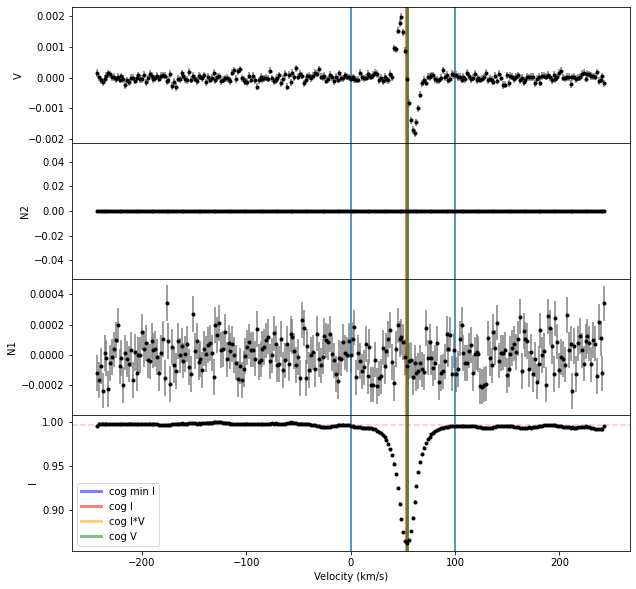

In [29]:
def cog_I(lsd, Ic):
    
    nominator = np.trapz(lsd.vel * (Ic-lsd.specI), x=lsd.vel)
    denominator = np.trapz( Ic-lsd.specI, x=lsd.vel ) 
    return(nominator/denominator)
           
def cog_IV(lsd, Ic):
    nominator = np.trapz(lsd.vel * np.abs( lsd.specV * (Ic-lsd.specI) ), x=lsd.vel )  
    denominator = np.trapz( np.abs( lsd.specV * (Ic-lsd.specI) ), x=lsd.vel )
    return(nominator/denominator)

def cog_V(lsd):
    nominator = np.trapz(lsd[k].vel * np.abs(lsd.specV), x=lsd.vel )  
    denominator = np.trapz( np.abs(lsd.specV), x=lsd.vel )
    return(nominator/denominator)

def cog_min(lsd):
    cog_min = lsd.vel[lsd.specI.argmin()]
    if cog_min.size > 1:
        cog_min = cog_min[0]
    return(cog_min)


def calcBz(lsd, cog='I', norm='auto', velrange=None, bzwidth=None, plot=True):
    '''Calculate the Bz of an LSD profile
    
    :param lsd: lsd object (input)
    :param cog: choice of value, or calculation method for the center of gravity.
    :param norm: choice of value, or calculation method for the continuum.
    :param velrange: range of velocity to use for the determination of the line center and the continnum. If not defined, the whole range will be used. If bzwidth is not defined, this range will also be used for the line Bz calculation. 
    :param bzwidth: distance from the line center to use in the Bz calculation. One element = same on each side of line center. Two elements, left and right of line center. Not defined: using velrange. 
    :param plot: whether or not a graph is displayed. 
    '''

    if velrange != None:
        inside = np.logical_and(lsd.vel>=velrange[0], lsd.vel<=velrange[1])
        lsd_in = lsd[inside]
        lsd_out = lsd[np.logical_not(inside)]
    else:
        lsd_in=np.copy(lsd)
        
    
    # Check if norm is a string.
    if isinstance(cog, str):
        print('using AUTO method for the normalization (only one coded up at the moment..)')
        if velrange != None:
            print('using the median of the continuum outside of the line')
            norm_val = np.median(lsd_out.specI)
        else:
            print('no range in velocity given, using the median of the whole specI to determine continnum')
            norm_val = np.median(lsd_out.specI)
    else:
        norm_val = np.copy(norm)
        print('using given norm value')
    
    
    
    
    if plot:
        fig, ax = plot_lsd(lsd)
        for item in ax:
            item.axvline(x=velrange[0])
            item.axvline(x=velrange[1])
        ax[3].axhline(y=norm_val, ls='--', c='pink')
            
        # for the plot, calculate and display all of the possible methods
        # for calculating the cog. 
        for item in ax:
            item.axvline(x=cog_min(lsd_in), label='cog min I', lw=3, alpha=0.5, c='blue')
            item.axvline(x=cog_I(lsd_in, norm_val), label='cog I',lw=3, alpha=0.5, c='red')
            item.axvline(x=cog_IV(lsd_in, norm_val), label='cog I*V',lw=3, alpha=0.5, c='orange')
            item.axvline(x=cog_IV(lsd_in, norm_val), label='cog V',lw=3, alpha=0.5, c='green')
           
        ax[3].legend(loc=0)
        

    # Check ig cog is a string.
    if isinstance(cog, str):
        # calculate the cog for the chosen method
        if cog == 'I':
            cog_val = cog_I(lsd_in, norm_val)
        if cog == 'min':
            cog_val = cog_min(lsd_in)
        if cog == 'IV':
            cog_val = cog_IV(lsd_in, norm_val)
        if cog == 'V':
            cog_cal = cog_V(lsd_in, norm_val)
    else:
        cog_val=np.copy(cog)
        
    
    
        
calcBz(lsd, cog='I', velrange=[0,100], plot=True)    
    